In [1]:

import numpy as np
from scipy import ndimage
import multiprocessing as mp
from tqdm import tqdm
from detectorSpace import *
import matplotlib.pyplot as plt
from skimage.transform import radon, rescale

In [2]:
dim = [21,21,11]
r = 15
r0 = [25,25,0]
lengthDim = [100,100,2*r]
beta = np.array([0,1,0])
beta = beta/np.sqrt(np.dot(beta,beta))
phi = np.pi/4
numDet = 11
posDet = [ -np.array([0,lengthDim[1]/2,0])+np.array([i,0,0])*lengthDim[0]/(numDet-1) -np.array([1,0,0])*lengthDim[0]/2 for i in range(numDet)] 

In [3]:
print(posDet)

[array([-50., -50.,   0.]), array([-40., -50.,   0.]), array([-30., -50.,   0.]), array([-20., -50.,   0.]), array([-10., -50.,   0.]), array([  0., -50.,   0.]), array([ 10., -50.,   0.]), array([ 20., -50.,   0.]), array([ 30., -50.,   0.]), array([ 40., -50.,   0.]), array([ 50., -50.,   0.])]


In [4]:
space = detectorSpace(dim,lengthDim,r0,r,beta,phi,numDet,posDet)

In [5]:
inputValues = np.linspace(0,360,100,endpoint=False)
coneSinogram = space.getConeSurfaceProjections(inputValues)

In [6]:
indices = np.where(space.positionMatrix[0,:,:,:] == 1)

zIndices = indices[2]
if zIndices.size == 0:
    zIndices = [0]
zMiddle = int((max(zIndices)+min(zIndices))/2)
print(zMiddle)
projectionSinogram = np.array(radon(space.positionMatrix[0,:,:,zMiddle], theta=inputValues)).T

15


/home/perlundhammar/anaconda3/lib/python3.12/site-packages/skimage/transform/radon_transform.py:74: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn(


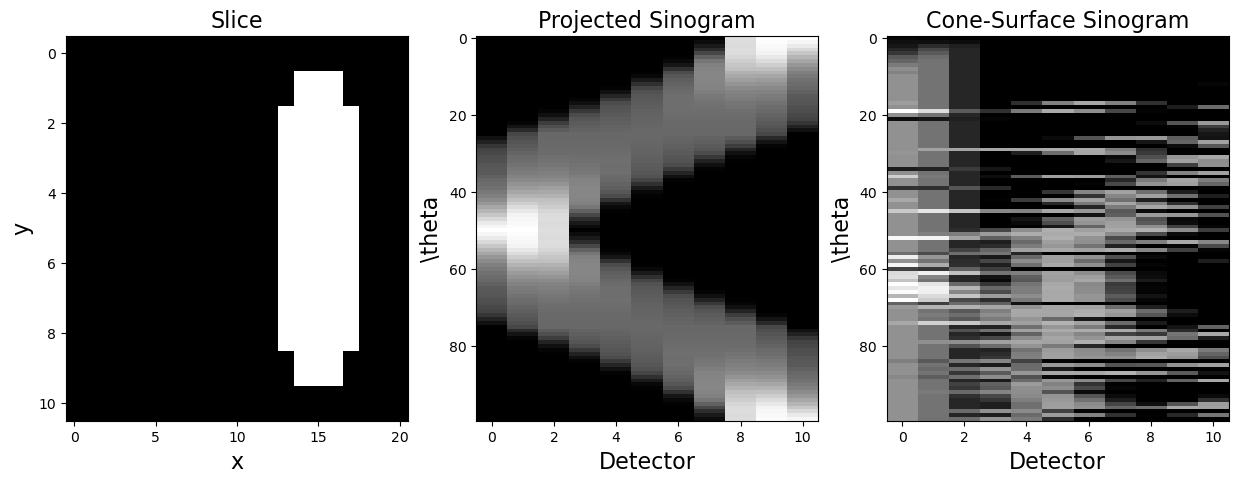

In [7]:

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))

image = space.positionMatrix[0,:,:,zMiddle]

ax1.set_ylabel("y",fontsize = 16)
ax1.set_xlabel("x",fontsize = 16)
ax1.set_title("Slice",fontsize = 16)
ax1.imshow(
    image,
    cmap=plt.cm.Greys_r,
    aspect='auto'#
)

image = projectionSinogram
ax2.set_ylabel(r"\theta",fontsize = 16)
ax2.set_xlabel("Detector",fontsize = 16)
ax2.set_title("Projected Sinogram",fontsize = 16)
ax2.imshow(
    image,
    cmap=plt.cm.Greys_r,
    aspect='auto'#
)
image = coneSinogram
ax3.set_ylabel(r"\theta",fontsize = 16)
ax3.set_xlabel("Detector",fontsize = 16)
ax3.set_title("Cone-Surface Sinogram",fontsize = 16)
ax3.imshow(
    image,
    cmap=plt.cm.Greys_r,
    aspect='auto'#
)
